In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
data=pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
data.shape

(14640, 15)

In [5]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


# Data Visualization

In [6]:
sentiment_counts = data.airline_sentiment.value_counts()

In [7]:
sentiment_counts

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
number_of_tweets = data.tweet_id.count()

In [9]:
number_of_tweets

14640

In [10]:
import matplotlib.pyplot as plt

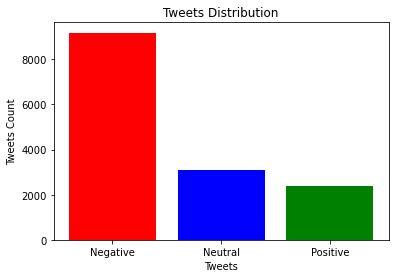

In [11]:
index=[1,2,3]
plt.bar(index,sentiment_counts,color=['r','b','g'])
plt.xticks(index,['Negative','Neutral','Positive'])
plt.xlabel('Tweets')
plt.ylabel('Tweets Count')
plt.title('Tweets Distribution')
plt.show()

# Data Cleaning

In [12]:
new_data = data.copy()
new_data = new_data[new_data['airline_sentiment_confidence'] > 0.65]
new_data['sentiment'] = new_data['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)


In [13]:
new_data.shape

(13651, 16)

In [14]:
new_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1


In [15]:
new_data['text_clean'] = new_data['text'].apply(lambda x: BeautifulSoup(x, "lxml").text)
new_data = new_data.loc[:, ['text_clean', 'sentiment']]
new_data.head()

,text_clean,sentiment
0,@VirginAmerica What @dhepburn said.,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1
5,@VirginAmerica seriously would pay $30 a fligh...,1


In [16]:
new_data["text_clean"][2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [17]:
x=new_data["text_clean"]
y=new_data["sentiment"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)


In [19]:
print(x_train.shape,x_test.shape)

(9146,) (4505,)


# Importing Dependency

In [20]:
import nltk

from nltk.corpus import stopwords
stopwords.words('english')

from nltk.tokenize import TweetTokenizer      #word_tokenizer(similler)
from nltk.stem import SnowballStemmer         #better then porter steemer

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc , roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score


# Define Function 

In [21]:
def tokenize(text): 
    tweet = TweetTokenizer()
    return tweet.tokenize(text)

In [22]:
def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [23]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = stopwords.words('english'))


In [24]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [25]:
import numpy as np
np.random.seed(1)

In [26]:
pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))


In [27]:
grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 


# FinalModel

In [29]:
grid_svm.fit(x_train, y_train)
grid_svm.score(x_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.9min finished


0.9079970018225489

In [30]:
grid_svm.best_score_

0.9038212188500218

In [31]:
def report_results(model, x_train,x_test,y_train,y_test):
    pred_proba = model.predict_proba(x_test)[:, 1]
    pred = model.predict(x_test)        

    auc = roc_auc_score(y_test, pred_proba)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    result = {'auc': auc*100, 'f1': f1*100, 'acc': acc*100, 'precision': prec*100
              , 'recall': rec*100}
    return result


In [32]:
report_results(grid_svm.best_estimator_,  x_train,x_test,y_train,y_test)


{'auc': 90.79977595941462,
 'f1': 85.83213773314203,
 'acc': 82.46392896781354,
 'precision': 90.3359758399396,
 'recall': 81.75606422958661}

In [34]:
grid_svm.predict(["flying with @united is always a great experience"])

array([0], dtype=int64)

In [35]:
grid_svm.predict(["@united very bad experience!"])

array([1], dtype=int64)